# Определение возраста покупателей

## Исследовательский анализ данных

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


In [6]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
file_name    7591 non-null object
real_age     7591 non-null int64
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [8]:
labels.head(10)

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
5,000005.jpg,27
6,000006.jpg,24
7,000007.jpg,43
8,000008.jpg,26
9,000009.jpg,39


In [3]:
labels.shape

(7591, 2)

Text(0, 0.5, 'Count')

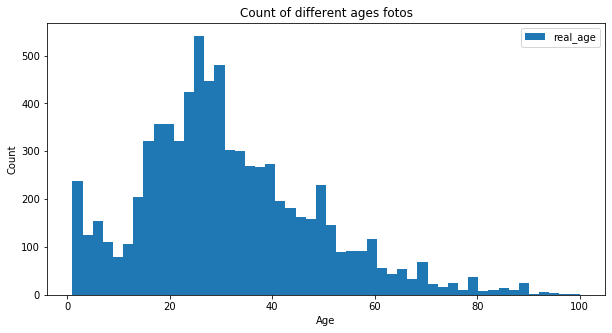

In [51]:
labels.plot(kind='hist',title='Count of different ages fotos', figsize=(10,5),bins=50 )
plt.xlabel('Age')
plt.ylabel('Count')

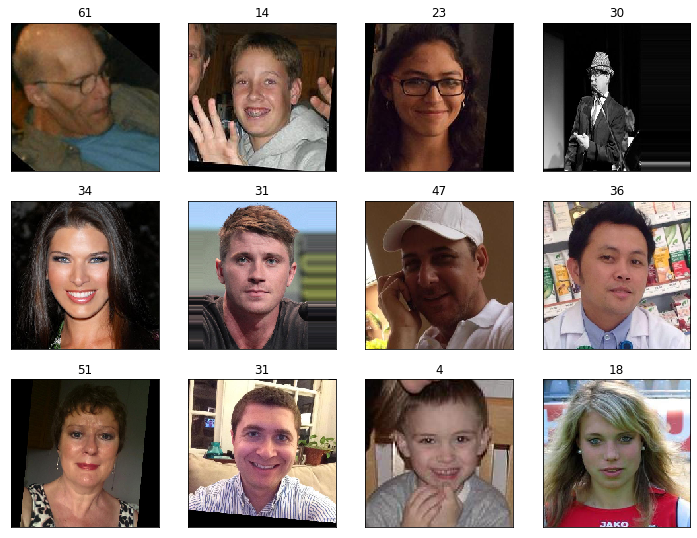

In [56]:
features, target = next(train_gen_flow)

fig = plt.figure(figsize=(10,10))
for i in range(12):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.title(target[i])

Вывод: 1.Размер датасета - 7591 фотография 2. Больше всего фотографий в диапазоне от 20 до 41 года. При этом в выборке присутствуют возраста от новорожденных до 100 лет. 3. На некоторых фотографиях присутствуют лишние предметы, например, жвачка, рука, очки, наушники, что может помешать обучению модели

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

<b>Вывод</b>:

## Анализ обученной модели

1.За 10 эпох обучения удалось уменьшить MAE с 10 до 2.8 на тренировочной выборке

Вывод: Модель сверточной нейронной сети построена на ResNet50.
Обученная модель позволяет с высокой точностью предсказывать возраст покупателей. Получение значения МАЕ 6 - хороший показатель, так как нам нужно знать к какой возрастной категории относится покупатель, 6 лет - незначительная ошибка. Обычно категории возраста делятся на большее кол-во лет. Дети - до 12, Подростки до 21,Зрелый до 45-50 и т.д